In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from poison2dsolver import PoissonSolver2D

---
### ZAD 1:
500 iteracji pętli relaksacyjnej. start od u=0.   
1. Narysuj $S$ od iteracji   
2. Po setnej i pięćsetnej iteracji nrusuj $u$ oraz:
 - $\rho '(x,y)  $ 
 - $\rho '(x,y) - \rho(x,y)$

In [3]:
PS = PoissonSolver2D()

iterations = 500
s_array = np.zeros(iterations)
#array to plot after 100 iterarions
u_100 = np.zeros_like(PS.u_grid)
ro_prim_100 = np.zeros_like(u_100)

    

In [4]:

for i in range(iterations):
    #one iteration on the u grid
    PS.update()
    #get the S value
    s_array[i] = PS.s_conv()
    if i ==100-1:
        u_100 = PS.u_grid.copy()
        ro_prim_100 = PS.ro_grid_prim.copy()

---
This is the result for S(iterations):

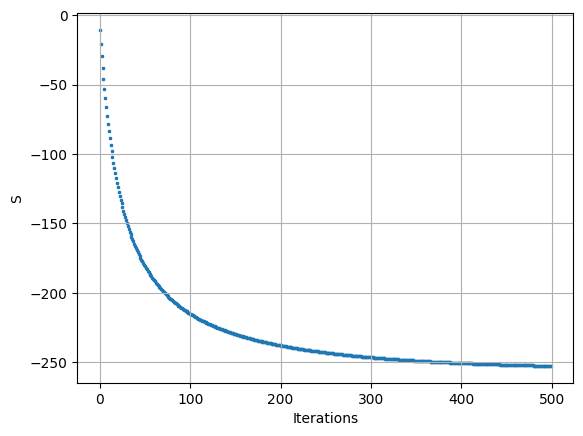

In [5]:
plt.scatter(np.arange(0,iterations), s_array, s=3, marker='x')
plt.xlabel('Iterations')
plt.ylabel('S')
plt.grid()
plt.show()

In [6]:
from matplotlib import colors

# Setting a consistent normalization for both plots
norm = colors.TwoSlopeNorm(vmin=-np.max(PS.u_grid), vcenter=0, vmax=np.max(PS.u_grid))


---
Next I show the potential u, found by the method after 500 iterations:

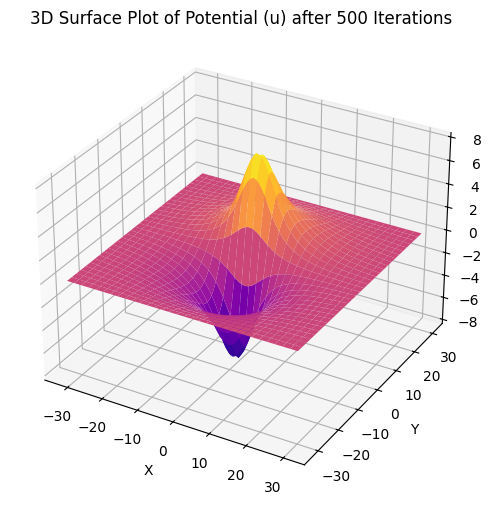

In [7]:
#Plot the u_grid after 500 iterations
x = np.linspace(-PS.size//2, PS.size//2, PS.size)
y = np.linspace(-PS.size//2, PS.size//2, PS.size)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, PS.u_grid, cmap='plasma', edgecolor='none', norm = norm)
ax.set_title(f'3D Surface Plot of Potential (u) after {PS.nr_iterations} Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential (u)')
plt.show()

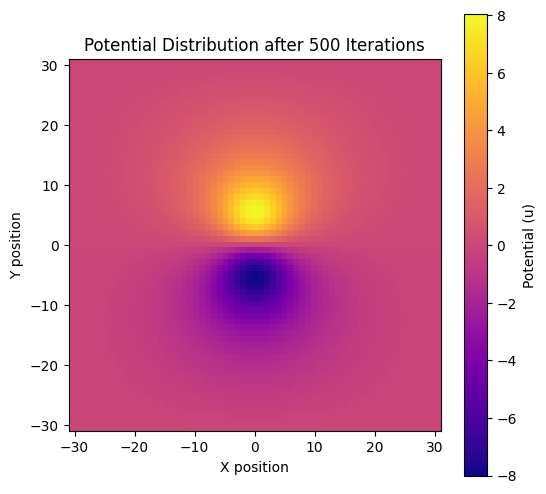

In [8]:
# Plotting the heatmap with axes from -N to N
plt.figure(figsize=(6, 6))
N = (PS.size - 1) // 2  # Calculate N from the grid size
plt.imshow(PS.u_grid, cmap='plasma', origin='lower', extent=[-N, N, -N, N], norm = norm)
plt.colorbar(label='Potential (u)')
plt.title(f'Potential Distribution after {PS.nr_iterations} Iterations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()


---
potential u after 100 iterations:

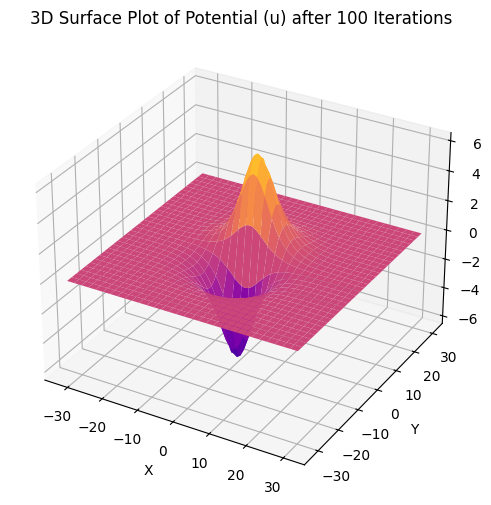

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, u_100, cmap='plasma', edgecolor='none', norm = norm)
ax.set_title(f'3D Surface Plot of Potential (u) after {100} Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potential (u)')
plt.show()

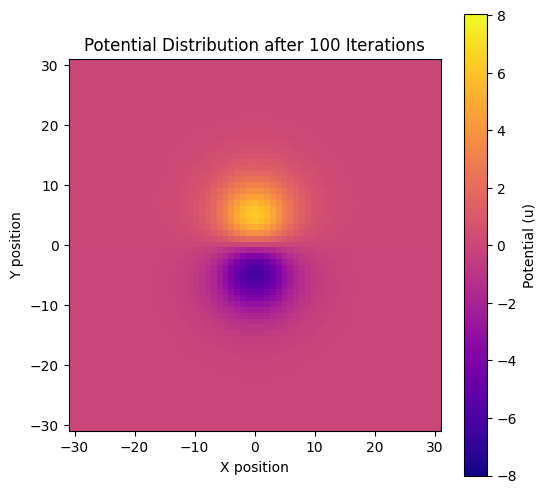

In [10]:
# Plotting the heatmap with axes from -N to N
plt.figure(figsize=(6, 6))
N = (PS.size - 1) // 2  # Calculate N from the grid size
plt.imshow(u_100, cmap='plasma', origin='lower', extent=[-N, N, -N, N], norm = norm)
plt.colorbar(label='Potential (u)')
plt.title(f'Potential Distribution after {100} Iterations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

---
Draw $\rho'$ after 500 iterations

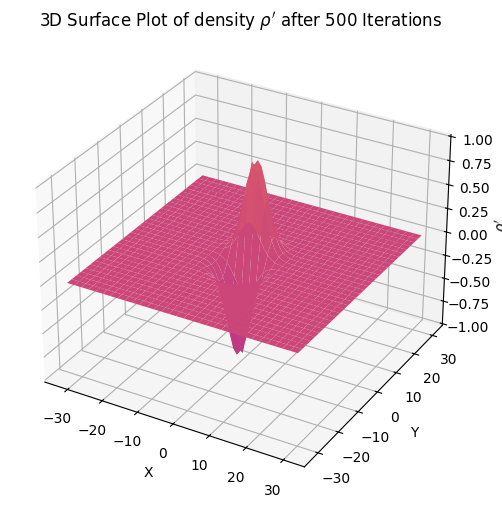

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, PS.ro_grid_prim, cmap='plasma', edgecolor='none', norm = norm)
ax.set_title(rf'3D Surface Plot of density $\rho^\prime$ after {500} Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\rho^\prime$')
plt.show()

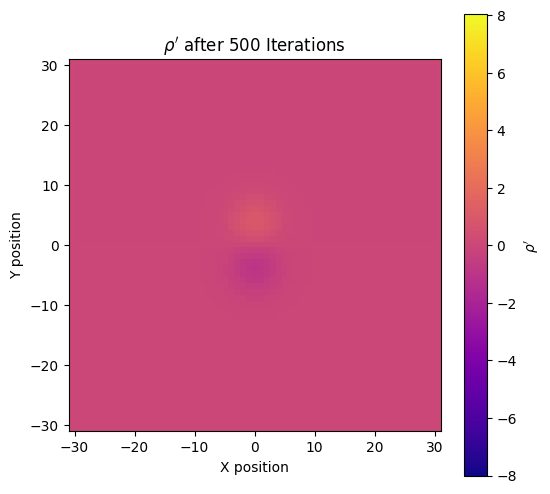

In [12]:
# Plotting the heatmap with axes from -N to N
plt.figure(figsize=(6, 6))
N = (PS.size - 1) // 2  # Calculate N from the grid size
plt.imshow(PS.ro_grid_prim, cmap='plasma', origin='lower', extent=[-N, N, -N, N], norm = norm)
plt.colorbar(label=r'$\rho^\prime$')
plt.title(r'$\rho^\prime$ after 500 Iterations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

---
Draw $\rho$' - $\rho$ after 500 iterations:

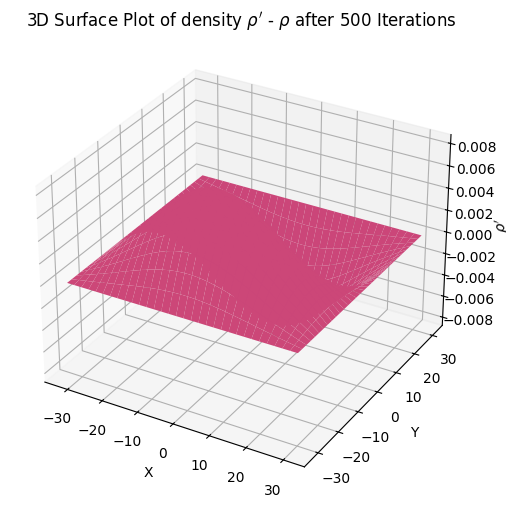

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, PS.ro_grid_prim - PS.ro_grid, cmap='plasma', edgecolor='none', norm = norm)
ax.set_title(rf'3D Surface Plot of density $\rho^\prime$ - $\rho$ after 500 Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\rho^\prime$')
plt.show()

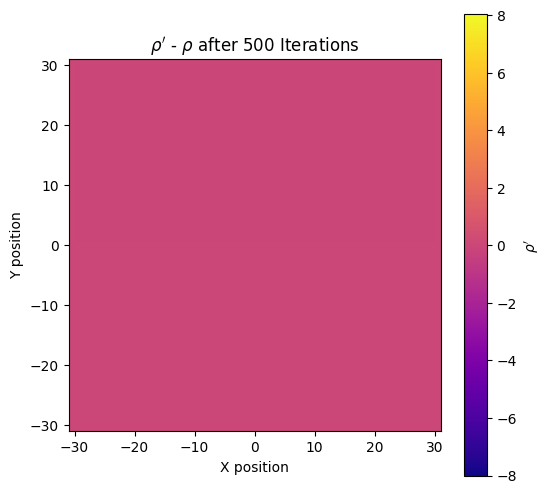

In [14]:
# Plotting the heatmap with axes from -N to N
plt.figure(figsize=(6, 6))
N = (PS.size - 1) // 2  # Calculate N from the grid size
plt.imshow(PS.ro_grid_prim - PS.ro_grid, cmap='plasma', origin='lower', extent=[-N, N, -N, N], norm = norm)
plt.colorbar(label=r'$\rho^\prime$')
plt.title(r'$\rho^\prime$ - $\rho$ after 500 Iterations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

---
$\rho$' after 100 iterations:


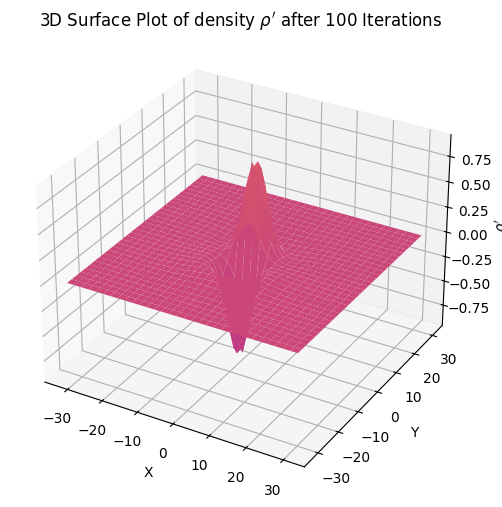

In [15]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, ro_prim_100, cmap='plasma', edgecolor='none', norm = norm)
ax.set_title(rf'3D Surface Plot of density $\rho^\prime$ after {100} Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\rho^\prime$')
plt.show()

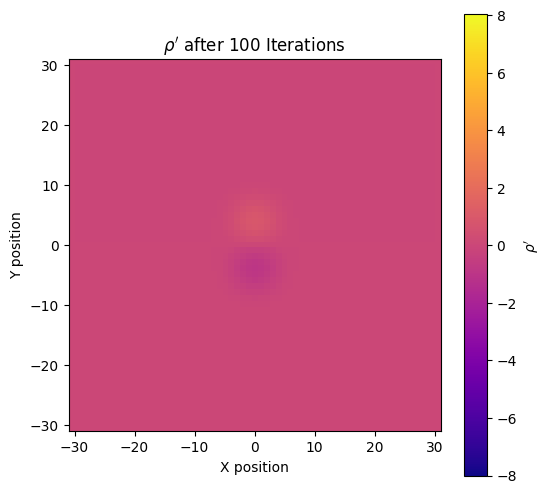

In [16]:
# Plotting the heatmap with axes from -N to N
plt.figure(figsize=(6, 6))
N = (PS.size - 1) // 2  # Calculate N from the grid size
plt.imshow(ro_prim_100, cmap='plasma', origin='lower', extent=[-N, N, -N, N], norm = norm)
plt.colorbar(label=r'$\rho^\prime$')
plt.title(r'$\rho^\prime$ after 100 Iterations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

---
Draw $\rho$' - $\rho$ after 100 iterations:

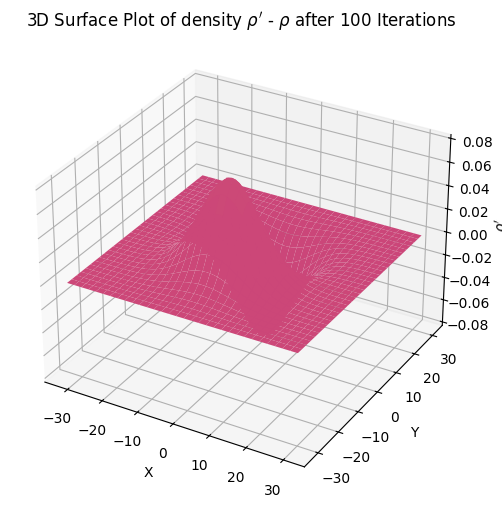

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, ro_prim_100 - PS.ro_grid, cmap='plasma', edgecolor='none', norm = norm)
ax.set_title(rf'3D Surface Plot of density $\rho^\prime$ - $\rho$ after 100 Iterations')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$\rho^\prime$')
plt.show()

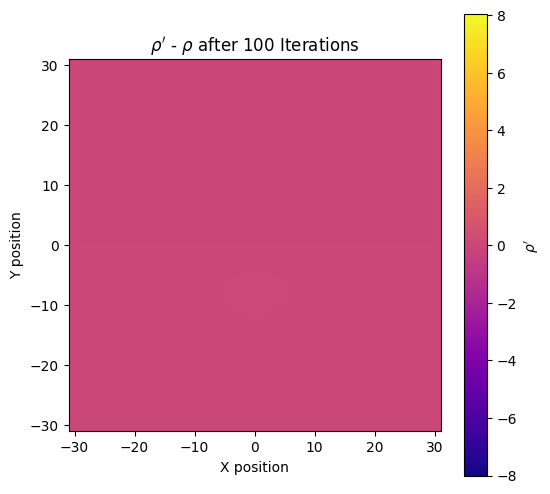

In [18]:
# Plotting the heatmap with axes from -N to N
plt.figure(figsize=(6, 6))
N = (PS.size - 1) // 2  # Calculate N from the grid size
plt.imshow(ro_prim_100 - PS.ro_grid, cmap='plasma', origin='lower', extent=[-N, N, -N, N], norm = norm)
plt.colorbar(label=r'$\rho^\prime$')
plt.title(r'$\rho^\prime$ - $\rho$ after 100 Iterations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()